# Tools & Libraries

In [378]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print(file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

from pa_lib.job import request_job
from pa_lib.file import project_dir, load_bin, load_csv
from pa_lib.data import desc_col
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
from pa_lib.vis import boxplot_histogram

# Data Intervista in cooperation with Stat.Amt Zürich

https://statistik.zh.ch/internet/justiz_inneres/statistik/de/aktuell/mitteilungen/2020/covid_mobilitaetsverhalten.html

In [703]:
link_distanzkat = "C:/Users/stc/data/covid19/download_mobilitäts-monitoring_covid-19/Distanzkategorien_in_Prozent_pro_Tag.csv"
link_mean_med ="C:/Users/stc/data/covid19/download_mobilitäts-monitoring_covid-19/Mittelwerte_und_Median_pro_Tag.csv"

mobility_zh_cat_distance = pd.read_csv(link_distanzkat,encoding="iso8859_15").astype({"Datum": "datetime64[ns]"})
mobility_zh_mean_med =  pd.read_csv(link_mean_med,encoding="iso8859_15").astype({"Datum": "datetime64[ns]"})
mobility_zh_cat_distance.loc[:,"dayofyear"] = mobility_zh_cat_distance.Datum.dt.dayofyear
mobility_zh_mean_med.loc[:,"dayofyear"] = mobility_zh_mean_med.Datum.dt.dayofyear


In [704]:
desc_col(mobility_zh_mean_med,det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
Datum,datetime64[ns],0/148,37,1.2 KB,"[2020-02-16 00:00:00,2020-03-23 00:00:00]"
Beschreibung,object,0/148,2,9.3 KB,"[Distanz,Radius]"
Typ,object,0/148,2,9.5 KB,"[Median,Mittelwert]"
Total,float64,0/148,148,1.2 KB,"[0.5954533353916489,46.61286546751471]"
Kanton_Zürich_Ja,float64,0/148,148,1.2 KB,"[0.842790549140792,48.0218818368276]"
Kanton_Zürich_Nein,float64,0/148,148,1.2 KB,"[0.563696294074579,46.8282216936125]"
Alter_15-29,float64,0/148,148,1.2 KB,"[0.733964423797158,60.5147600746345]"
Alter_30-64,float64,0/148,148,1.2 KB,"[0.6071097420925079,45.3239440923658]"
Alter_65-79,float64,0/148,148,1.2 KB,"[0.38882251085537894,38.932019131741704]"
Männlich,float64,0/148,148,1.2 KB,"[0.601248823774154,52.902624255822204]"


In [692]:
mobility_zh_cat_distance.sample(5)

,Datum,Beschreibung,Ausprägung,Total,Kanton_Zürich_Ja,Kanton_Zürich_Nein,Alter_15-29,Alter_30-64,Alter_65-79,Männlich,Weiblich,Städtisch,Ländlich,Erwebstätig,In_Ausbildung,Nicht_Erwerbstätig
198,2020-03-02,Distanz,20 - 50 Kilometer,26.0235943,29.5593761,25.1384135,29.1160637,26.3999654,19.4293657,26.8385574,25.2081421,23.4450594,29.6542684,27.0096502,26.2670308,20.9494405
397,2020-03-17,Radius,500 Meter - 2 Kilometer,19.9686872,21.7661864,19.5176553,19.9504377,18.6246525,26.2437765,19.4496161,20.4880699,21.4783482,17.9426040,18.5260176,22.0172463,25.2859632
301,2020-03-10,Distanz,10 - 20 Kilometer,16.2511725,14.9750086,16.5707161,17.8779826,15.3372015,17.8210723,15.5476101,16.9551571,17.8717191,13.9367177,15.3086649,18.7514341,18.5953661
353,2020-03-14,Distanz,10 - 20 Kilometer,16.5202264,14.4230867,17.0510686,15.6374500,16.6030557,17.4832000,16.4461420,16.5943553,17.1979370,15.5885743,17.1632943,15.6297027,14.3997189
178,2020-02-29,Radius,10 - 20 Kilometer,14.0615620,18.0910156,13.0674912,16.1311468,14.2286199,10.1071049,16.0377089,12.0856339,11.7606937,17.1621500,14.3722449,15.7464220,11.0282950


In [695]:
mobility_zh_cat_distance.describe()

,Total,Kanton_Zürich_Ja,Kanton_Zürich_Nein,Alter_15-29,Alter_30-64,Alter_65-79,Männlich,Weiblich,Städtisch,Ländlich,Erwebstätig,In_Ausbildung,Nicht_Erwerbstätig
count,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000,481.0000000
mean,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154,15.3846154
std,8.7569881,9.2382808,8.7094238,8.5941161,8.8206313,11.1227104,8.4078374,9.3071013,9.4024892,8.7053422,8.7762963,8.8390731,10.8886997
min,0.2817438,0.1972279,0.2865300,0.3488874,0.0968801,0.0000000,0.2816409,0.0698647,0.2444166,0.2091478,0.1546592,0.2404831,0.0000000
25%,9.9176015,8.8065523,10.0852823,9.1859143,10.0378161,6.0916305,10.2232668,8.8384456,9.2356579,9.7932563,9.7335434,8.8016548,6.0760497
50%,14.7011832,14.3393675,14.8909211,15.1151767,14.9226421,13.5121521,14.8629513,15.0176982,13.9334727,13.9084121,14.8574954,14.5701039,13.6765202
75%,19.2270779,21.4240838,19.1303884,19.8607526,19.3178942,23.1172133,19.3253845,20.6933402,21.4744363,21.5142635,19.2568075,19.7406427,23.0857512
max,48.7227157,44.1663361,49.8629662,46.3429719,48.2051910,55.1713589,48.5344134,48.9111310,49.6127377,47.5361456,47.5084034,47.4933793,56.2415263


In [705]:
mobility_zh_cat_distance[
    (mobility_zh_cat_distance.Ausprägung == "10 - 20 Kilometer")
    & (mobility_zh_cat_distance.Beschreibung == "Distanz")
]

,Datum,Beschreibung,Ausprägung,Total,Kanton_Zürich_Ja,Kanton_Zürich_Nein,Alter_15-29,Alter_30-64,Alter_65-79,Männlich,Weiblich,Städtisch,Ländlich,Erwebstätig,In_Ausbildung,Nicht_Erwerbstätig,dayofyear
2,2020-02-16,Distanz,10 - 20 Kilometer,12.2016998,11.2400113,12.4491462,12.7267457,12.1612467,11.5971261,13.1933861,11.2094183,12.1152528,12.3228358,12.3634883,12.5773733,11.1621581,47
15,2020-02-17,Distanz,10 - 20 Kilometer,16.0793449,13.0862911,16.8425405,16.8270110,15.0553842,19.4108295,15.7884614,16.3704029,17.5397397,14.0037840,14.8574954,19.3058785,19.1124540,48
28,2020-02-18,Distanz,10 - 20 Kilometer,17.0207975,18.4324555,16.6694399,16.3301842,15.9375439,22.8841654,15.5170531,18.5254444,20.0547228,12.6929624,16.3229566,17.7479982,19.7091927,49
41,2020-02-19,Distanz,10 - 20 Kilometer,16.4018923,17.6067900,16.1011062,16.6748446,16.0865235,17.4017102,16.1296103,16.6743377,18.7040687,13.1330032,15.6047235,19.9207724,17.2169332,50
54,2020-02-20,Distanz,10 - 20 Kilometer,16.1241997,14.8942377,16.4332622,16.6953558,15.6200238,17.4617915,16.2628936,15.9854224,18.9695183,12.1548314,15.7954382,18.9676199,15.2094555,51
67,2020-02-21,Distanz,10 - 20 Kilometer,14.6565276,13.7091370,14.8909211,12.8408811,14.9226421,16.2950899,13.5386308,15.7733334,16.0347736,12.7149282,14.4358191,14.2291271,16.0893977,52
80,2020-02-22,Distanz,10 - 20 Kilometer,15.1197168,15.0631844,15.1340567,10.8160951,16.0912516,17.4451393,14.1909508,16.0507965,16.4758308,13.2598308,15.6993576,13.2323290,13.9146313,53
93,2020-02-23,Distanz,10 - 20 Kilometer,13.6350386,14.0804553,13.5213698,11.7893051,14.2182177,13.8820015,12.8111745,14.4599621,14.6953094,12.1964606,13.6010170,12.4412644,14.8058563,54
106,2020-02-24,Distanz,10 - 20 Kilometer,16.4508202,16.4091711,16.4614093,16.4057611,16.4046413,16.7294015,15.7488160,17.1536742,18.1567375,14.0864733,16.1544475,16.2259109,18.0685106,55
119,2020-02-25,Distanz,10 - 20 Kilometer,17.4641440,18.9838662,17.0781626,16.9155040,17.6162267,17.6315845,15.0091143,19.9206470,18.4004433,16.1387185,17.3844098,15.8147904,19.3817799,56


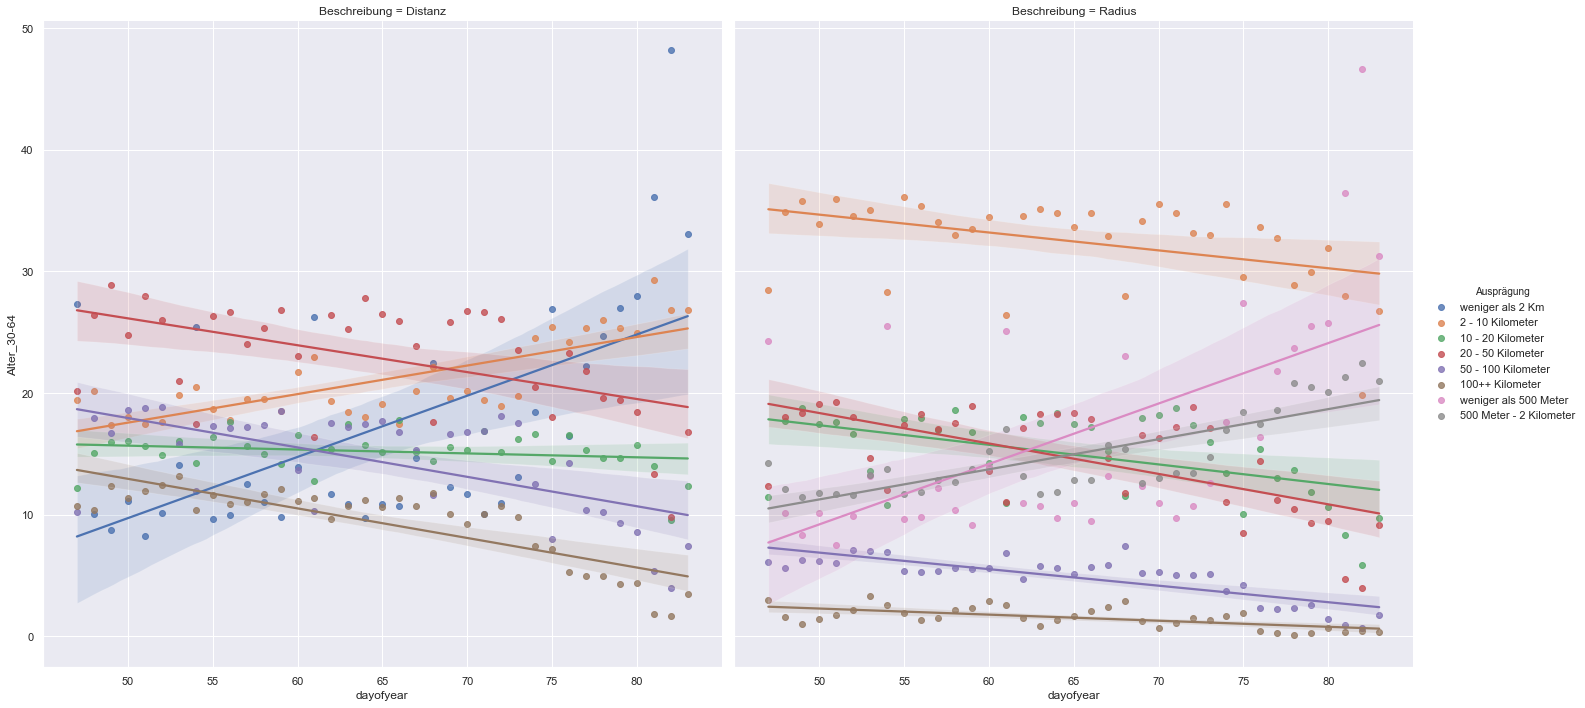

In [709]:
sns.lmplot(
    y="Alter_30-64",
    x="dayofyear",
    hue="Ausprägung",
    col="Beschreibung",
    data=mobility_zh_cat_distance,
    height=10
)

# Bundesrat Data

In [675]:
bundesrat_df = pd.DataFrame(
    [
        ("28.02.2020", "Coronavirus: Bundesrat verbietet grosse Veranstaltungen"),
        (
            "06.03.2020",
            "Coronavirus: Verstärkter Schutz besonders gefährdeter Personen und Evaluation der wirtschaftlichen Auswirkungen",
        ),
        (
            "08.03.2020",
            "Die Grenze zu Italien bleibt offen für Grenzgängerinnen und Grenzgänger (zuletzt geändert am 09.03.2020)",
        ),
        (
            "13.03.2020",
            "Bundesrat verschärft Massnahmen gegen das Coronavirus zum Schutz der Gesundheit und unterstützt betroffene Branchen",
        ),
        (
            "16.03.2020",
            "Coronavirus: Bundesrat erklärt die «ausserordentliche Lage» und verschärft die Massnahmen (zuletzt geändert am 17.03.2020)",
        ),
        (
            "20.03.2020",
            "Coronavirus: Bundesrat verbietet Ansammlungen von mehr als fünf Personen",
        ),
        (
            "25.03.2020",
            "Coronavirus: Bewilligungspflicht für die Ausfuhr medizinischer Schutzausrüstung",
        ),
    ],
    columns=["datum", "beschluss"],
)
bundesrat_df.loc[:, "datum"] = bundesrat_df.datum.apply(
    lambda x: pd.to_datetime(x, format="%d.%m.%Y")
)
bundesrat_df.loc[:, "dayofyear"] = bundesrat_df.datum.dt.dayofyear
bundesrat_df.loc[:, "hourofyear"] = bundesrat_df.dayofyear * 24

In [676]:
bundesrat_df

,datum,beschluss,dayofyear,hourofyear
0,2020-02-28,Coronavirus: Bundesrat verbietet grosse Verans...,59,1416
1,2020-03-06,Coronavirus: Verstärkter Schutz besonders gefä...,66,1584
2,2020-03-08,Die Grenze zu Italien bleibt offen für Grenzgä...,68,1632
3,2020-03-13,Bundesrat verschärft Massnahmen gegen das Coro...,73,1752
4,2020-03-16,Coronavirus: Bundesrat erklärt die «ausserorde...,76,1824
5,2020-03-20,Coronavirus: Bundesrat verbietet Ansammlungen ...,80,1920
6,2020-03-25,Coronavirus: Bewilligungspflicht für die Ausfu...,85,2040


# data import

https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031

In [677]:
url_2020 = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/44607195-a2ad-4f9b-b6f1-d26c003d85a2/download/sid_dav_verkehrszaehlung_miv_od2031_2020.csv"
url_2019 = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/fa64fa70-6328-4d47-bcf0-1eff694d7c22/download/sid_dav_verkehrszaehlung_miv_od2031_2019.csv"
url_2018 = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/d5963dee-7841-4e64-9268-6c850a2fc497/download/sid_dav_verkehrszaehlung_miv_od2031_2018.csv"
url_2017 = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/f873cc29-96ac-4b2f-b175-f733513e4012/download/sid_dav_verkehrszaehlung_miv_od2031_2017.csv"
url_verkehr = [url_2020, url_2019,url_2018,url_2017]

In [678]:
def load_verkehr_data(url_list):
    zh_raw_df = pd.concat([pd.read_csv(url, low_memory=False) for url in url_list])
    zh_raw_df = zh_raw_df.astype(
        {
            "MessungDatZeit": "datetime64[ns]",
            "LieferDat": "datetime64[ns]",
            # "AnzFahrzeuge": "int64",
        }
    )
    zh_raw_df.loc[:, "hour"] = zh_raw_df.MessungDatZeit.dt.hour
    zh_raw_df.loc[:, "dayofweek"] = zh_raw_df.MessungDatZeit.dt.dayofweek
    zh_raw_df.loc[:, "month_name"] = zh_raw_df.MessungDatZeit.dt.month_name()
    zh_raw_df.loc[:, "year"] = zh_raw_df.MessungDatZeit.dt.year
    zh_raw_df.loc[:, "dayofyear"] = zh_raw_df.MessungDatZeit.dt.dayofyear
    
    return zh_raw_df

In [679]:
%%time
zh_verkehr = load_verkehr_data(url_list=url_verkehr)

Wall time: 2min 23s


In [390]:
desc_col(zh_verkehr,det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
MSID,object,0/5007576,187,348.6 MB,"[Z001M001,Z097M002]"
MSName,object,0/5007576,1,353.4 MB,"[Unbekannt,Unbekannt]"
ZSID,object,0/5007576,94,329.5 MB,"[Z001,Z097]"
ZSName,object,0/5007576,95,560.7 MB,"[A3W (A4 Uetlibergtunnel Brunau),Zollikerstras..."
Achse,object,0/5007576,86,431.7 MB,"[A1L,Zürcherstrasse (Badenerstrassse)]"
HNr,object,0/5007576,43,343.3 MB,"[1,Unbekannt]"
Hoehe,object,0/5007576,102,398.9 MB,"[10m ab Knoten,vor Würzgrabenstrasse]"
EKoord,float64,0/5007576,181,76.4 MB,"[2678017.34,2687630.91]"
NKoord,float64,0/5007576,181,76.4 MB,"[1242969.91,1253804.18]"
Richtung,object,0/5007576,66,433.3 MB,"[A3 und Schimmelstrasse,einwärts]"


In [391]:
zh_verkehr.to_pickle("20200325_zh_verkehr_backup.pkl")

# Keep only MSID which worked most of the time (upper quantile)

In [392]:
def msid_uptime_okay(zh_verkehr_all: pd.DataFrame) -> pd.DataFrame:
    msid_uptime_hrs_per_year = pd.pivot_table(
        zh_verkehr_all[~zh_verkehr_all.AnzFahrzeuge.isna()],
        index="MSID",
        columns="year",
        values="AnzFahrzeuge",
        aggfunc="count",
    ).reset_index(inplace=False)

    quantiles_uptime_count = msid_uptime_hrs_per_year.quantile(0.90, axis=0) * 0.95

    year_list = list(msid_uptime_hrs_per_year.columns)
    year_list.remove("MSID")
    is_above_quantile = pd.Series(msid_uptime_hrs_per_year.shape[0] * [True])

    for year in year_list:
        is_above_quantile = (
            msid_uptime_hrs_per_year.loc[:, year] >= quantiles_uptime_count[year]
        ) & is_above_quantile

    print(is_above_quantile.value_counts())
    working_msid = list(set(msid_uptime_hrs_per_year.loc[is_above_quantile,"MSID"]))
    return zh_verkehr_all.loc[zh_verkehr_all.MSID.isin(working_msid),:]

#print(msid_uptime_hrs_per_year[is_above_quantile])

In [393]:
zh_verkehr_cleaned = msid_uptime_okay(zh_verkehr_all=zh_verkehr)

True     117
False     66
dtype: int64


In [394]:
desc_col(zh_verkehr_cleaned,det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
MSID,object,0/3305016,117,230.1 MB,"[Z001M001,Z089M002]"
MSName,object,0/3305016,1,233.2 MB,"[Unbekannt,Unbekannt]"
ZSID,object,0/3305016,69,217.5 MB,"[Z001,Z089]"
ZSName,object,0/3305016,69,367.3 MB,"[Albisriederstrasse (Hubertus),Zollikerstrasse..."
Achse,object,0/3305016,63,285.0 MB,"[Albisriederstrasse,Zollikerstrasse]"
HNr,object,0/3305016,34,226.1 MB,"[10,Unbekannt]"
Hoehe,object,0/3305016,64,260.0 MB,"[10m ab Knoten,vor Wasserwerkstrasse]"
EKoord,float64,0/3305016,117,50.4 MB,"[2678132.31,2687628.72]"
NKoord,float64,0/3305016,117,50.4 MB,"[1242969.91,1253804.18]"
Richtung,object,0/3305016,54,285.9 MB,"[A3 und Schimmelstrasse,einwärts]"


## Some Plots

In [232]:
import seaborn as sns
sns.set_style("darkgrid")

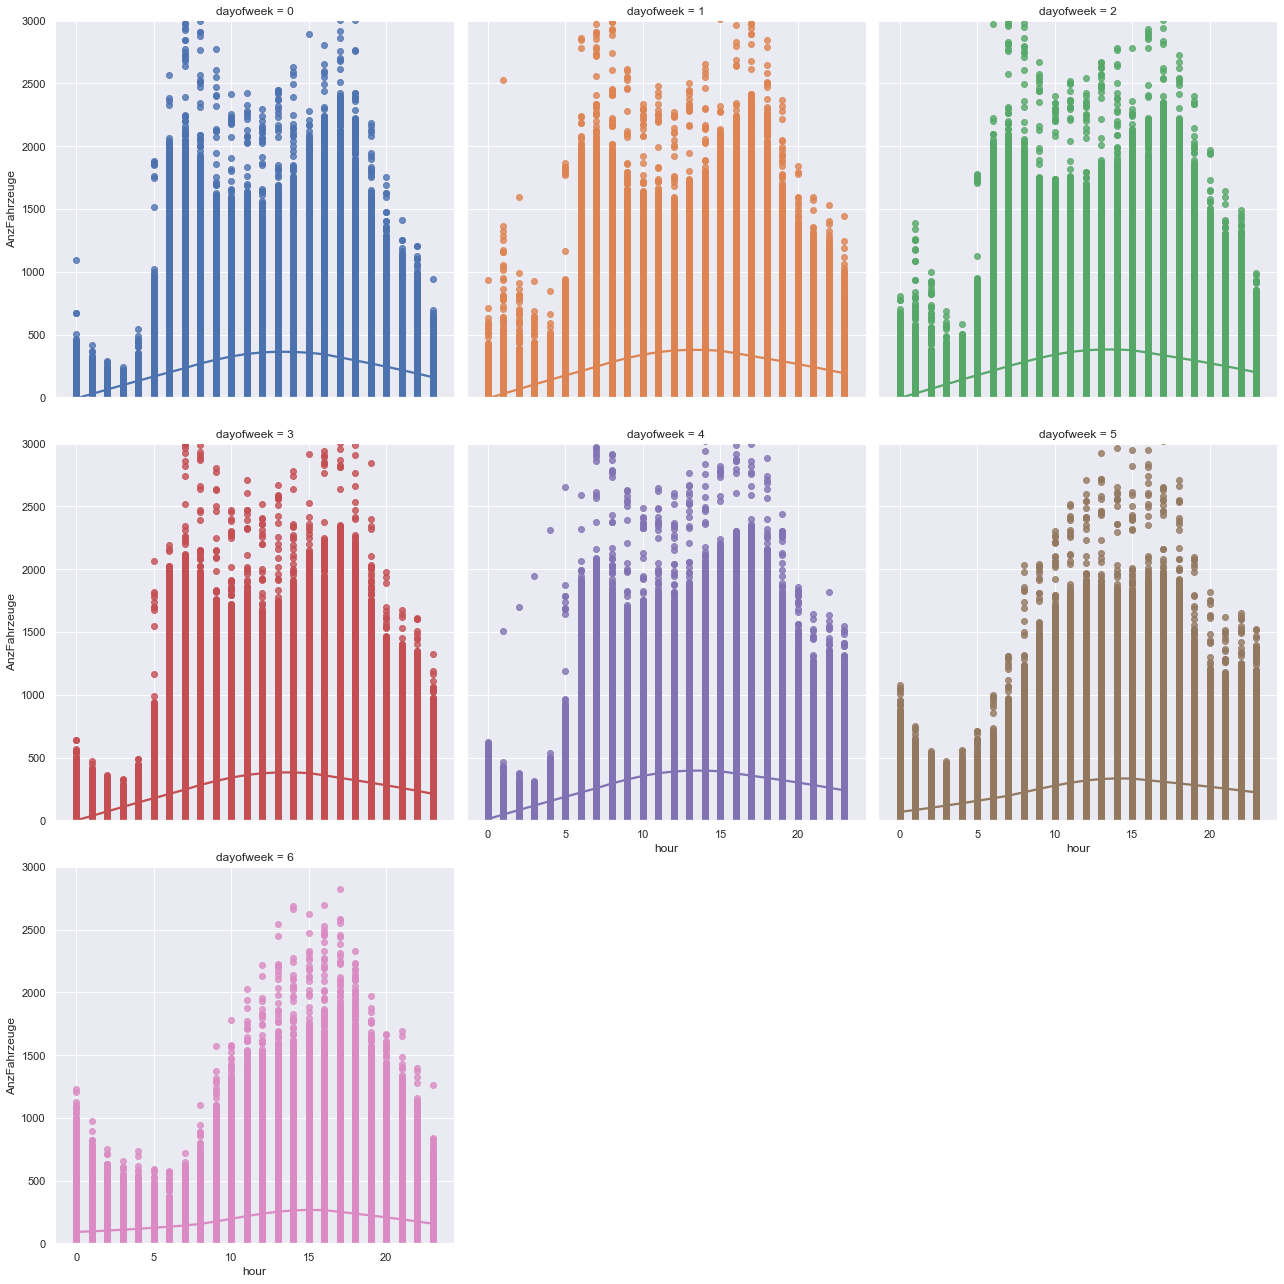

In [143]:
g = sns.lmplot(
    x="hour",
    y="AnzFahrzeuge",
    col="dayofweek",
    hue="dayofweek",  # kinda useless, but nice to look at!
    data=zh_verkehr,
    col_wrap=3,  # How many plots per row
    height=6,
    #order=2,  # polynomial regression of order, best for 1 or 2
    lowess = True,
     ci       = 95,
).set(ylim=(0,3000))

# LOWESS (Locally Weighted Scatterplot Smoothing)

(736330.0, 737506.9583333334)

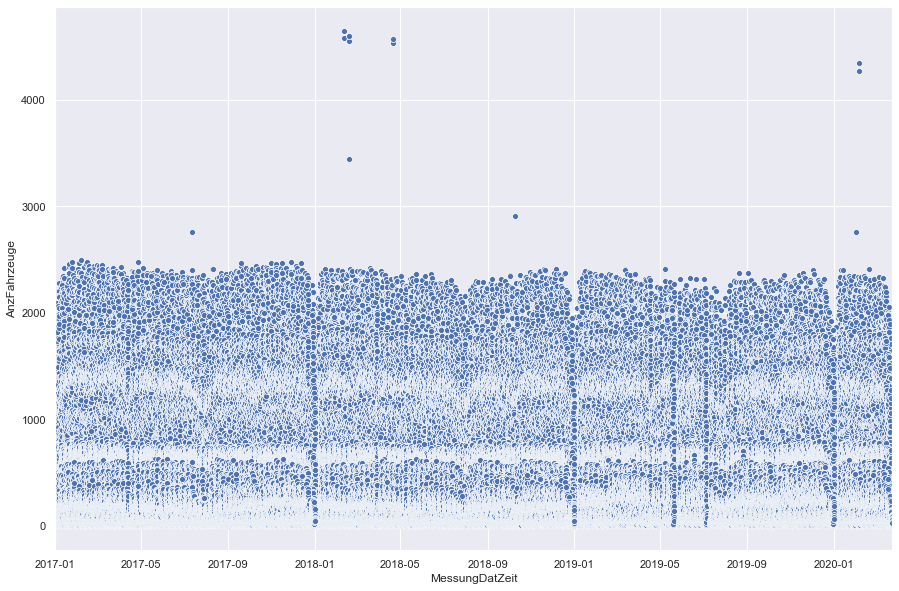

In [395]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x="MessungDatZeit", y="AnzFahrzeuge", data=zh_verkehr_cleaned)
ax.set_xlim([min(zh_verkehr_cleaned.MessungDatZeit), max(zh_verkehr_cleaned.MessungDatZeit)])

In [396]:
lowess = sm.nonparametric.lowess

In [402]:
%%time
lowess_anzfahrzeuge = lowess(
    exog=zh_verkehr_cleaned.MessungDatZeit,
    endog=zh_verkehr_cleaned.AnzFahrzeuge,
    frac=0.01,
    return_sorted=False,
    missing="drop"
)

Wall time: 3min


In [403]:
len(lowess_anzfahrzeuge)

3305016

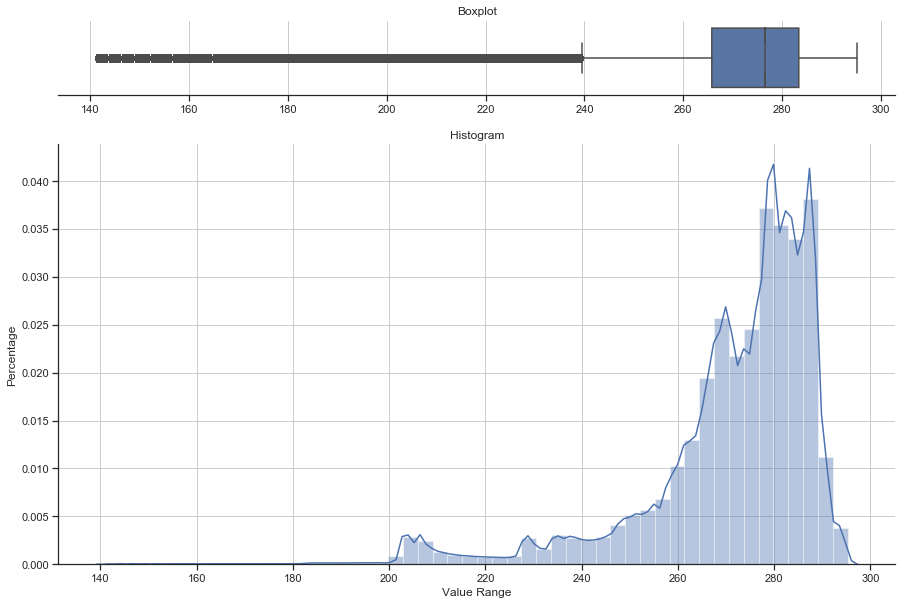

In [404]:
boxplot_histogram(lowess_anzfahrzeuge)

In [411]:
zh_verkehr_cleaned = zh_verkehr_cleaned.drop(columns=["anzfahrzeuge_lowess"])
zh_verkehr_cleaned.loc[:,"anzfahrzeuge_lowess"] = lowess_anzfahrzeuge

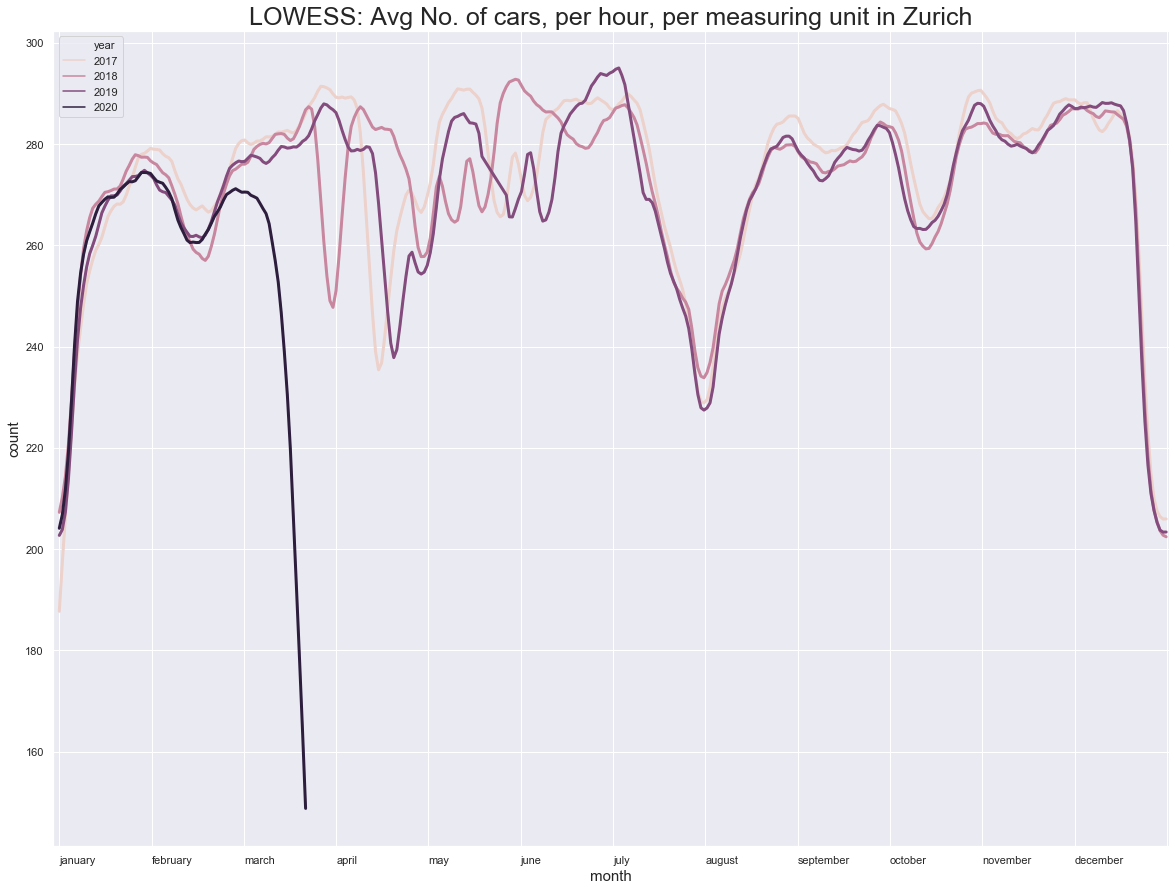

In [406]:
sns.set_style("darkgrid")

xticks = np.linspace(start=1, stop=365.25, num=13, endpoint=True)

plt.figure(figsize=(20, 15))

ax = sns.lineplot(
    x="dayofyear",
    y="anzfahrzeuge_lowess",
    hue="year",
    linewidth=3,
    data=zh_verkehr_cleaned[~zh_verkehr_cleaned.anzfahrzeuge_lowess.isna()],
    legend="full",
)
ax.set_xticks(xticks)
ax.set_xticklabels(
    [
        "january",
        "february",
        "march",
        "april",
        "may",
        "june",
        "july",
        "august",
        "september",
        "october",
        "november",
        "december",
        "",
    ]
)
plt.xticks(rotation=0, ha="left")
ax.set_xlim([-1, 366])

plt.xlabel("month", fontsize=15)
plt.ylabel("car-count per hour, per measuring unit", fontsize=15)
plt.title("LOWESS: Number of cars detected per measuring unit in Zurich (city)", fontsize=25)

plt.savefig("anz_cars_01.png")

In [423]:
zh_verkehr_cleaned.describe().round(1)

,EKoord,NKoord,Knummer,AnzDetektoren,D1ID,AnzFahrzeuge,hour,dayofweek,year,dayofyear,anzfahrzeuge_lowess
count,3305016.0,3305016.0,3305016.0,3305016.0,3305016.0,3267418.0,3305016.0,3305016.0,3305016.0,3305016.0,3267418.0
mean,2682343.2,1248472.0,433.8,1.5,12.8,344.7,11.5,3.0,2018.1,173.1,271.1
std,2001.9,2443.3,247.9,0.6,6.4,339.0,6.9,2.0,0.9,108.0,18.8
min,2678132.3,1242969.9,3.0,1.0,1.0,0.0,0.0,0.0,2017.0,1.0,141.3
25%,2681455.2,1247014.4,305.0,1.0,11.0,95.0,5.8,1.0,2017.0,74.0,265.8
50%,2682467.0,1247929.7,428.0,1.0,13.0,251.0,11.5,3.0,2018.0,169.0,276.5
75%,2683585.4,1250227.0,661.0,2.0,16.0,471.0,17.2,5.0,2019.0,267.0,283.4
max,2687628.7,1253804.2,789.0,3.0,29.0,4642.0,23.0,6.0,2020.0,365.0,295.2


In [425]:
zh_verkehr_cleaned.sample(3).T

,1159541,843507,1171646
MSID,Z071M002,Z052M001,Z072M001
MSName,Unbekannt,Unbekannt,Unbekannt
ZSID,Z071,Z052,Z072
ZSName,Badenerstrasse (Zypressenstrasse),Hirschwiesentunnel,Manessestrasse (Weststrasse)
Achse,Badenerstrasse,Hirschwiesentunnel,Manessestrasse
HNr,298,Unbekannt,Unbekannt
Hoehe,Unbekannt,Westportal,Weststrasse
EKoord,2681175,2682984,2682048
NKoord,1247888,1250310,1247026
Richtung,Seebahnstrasse,Winterthur,auswärts


In [426]:
zh_verkehr_cleaned.columns

Index(['MSID', 'MSName', 'ZSID', 'ZSName', 'Achse', 'HNr', 'Hoehe', 'EKoord',
       'NKoord', 'Richtung', 'Knummer', 'Kname', 'AnzDetektoren', 'D1ID',
       'D2ID', 'D3ID', 'D4ID', 'MessungDatZeit', 'LieferDat', 'AnzFahrzeuge',
       'AnzFahrzeugeStatus', 'hour', 'dayofweek', 'month_name', 'year',
       'dayofyear', 'anzfahrzeuge_lowess'],
      dtype='object')

In [547]:
prep_01 = zh_verkehr_cleaned.loc[
    :,
    [
        # "MessungDatZeit",
        "hour",
        # "dayofweek",
        # "month_name",
        "year",
        "dayofyear",
        "anzfahrzeuge_lowess",
    ],
].drop_duplicates()

prep_01.loc[:, "hourofyear"] = prep_01.hour + (prep_01.dayofyear - 1) * 24

prep_02 = pd.pivot_table(
    prep_01, index="hourofyear", columns="year", values="anzfahrzeuge_lowess"
).reset_index()

del prep_01


prep_02.loc[:, "factor"] = prep_02.loc[:, 2020] / prep_02.loc[:, 2019]

most_recent_factor = (
    prep_02[~prep_02.factor.isna()]
    .sort_values("hourofyear", ascending=False)
    .iloc[0, -1]
)

In [570]:
prep_02.loc[:, "2020_estimated"] = prep_02.loc[:, 2020].fillna(
    prep_02.loc[:, 2019] * most_recent_factor
)

In [632]:
num_unknowns = prep_02[prep_02.loc[:, 2020].isna()].shape[0]
num_knowns = prep_02.shape[0] - num_unknowns

factor_series = (
    pd.Series([1] * num_knowns)
    .append(
        pd.Series(
            np.linspace(
                start=most_recent_factor, stop=1, num=num_unknowns, endpoint=True
            )
        )
    )
    .reset_index(inplace=False)
    .iloc[:, -1]
)

In [633]:
prep_02.loc[:, "2020_estimated_v2"] = prep_02.loc[:, 2020].fillna(
    prep_02.loc[:, 2019] * factor_series
)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan.html

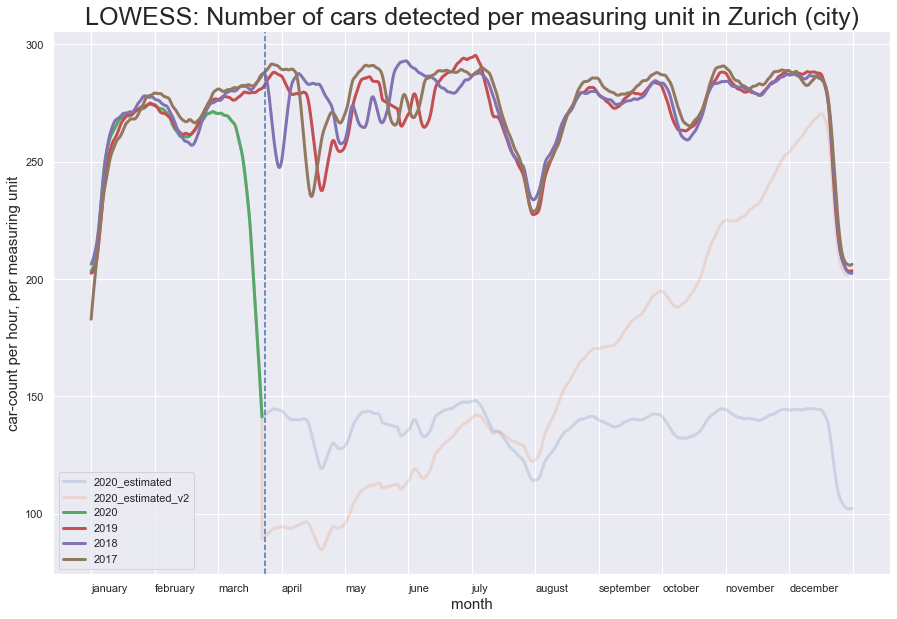

In [651]:
plt.figure(figsize=(15, 10))
xticks = np.linspace(start=1, stop=365.25 * 24, num=13, endpoint=True)
last_actual_date = (
    prep_02[~prep_02.loc[:2020].isna()]
    .sort_values("hourofyear", ascending=False)
    .iloc[0, 0]
)


ax = sns.lineplot(
    x="hourofyear",
    y="2020_estimated",
    data=prep_02,
    label="2020_estimated",
    alpha=0.2,
    linewidth=3,
)

ax = sns.lineplot(
    x="hourofyear",
    y="2020_estimated_v2",
    data=prep_02,
    label="2020_estimated_v2",
    alpha=0.2,
    linewidth=3,
)


for year in [2020, 2019, 2018, 2017]:
    ax = sns.lineplot(
        x="hourofyear", y=year, data=prep_02, label=str(year), linewidth=3
    )


ax.set_xticks(xticks)
ax.set_xticklabels(
    [
        "january",
        "february",
        "march",
        "april",
        "may",
        "june",
        "july",
        "august",
        "september",
        "october",
        "november",
        "december",
        "",
    ]
)
plt.xticks(rotation=0, ha="left")
plt.axvline(last_actual_date-24, linestyle="--")
plt.xlabel("month", fontsize=15)
plt.ylabel("car-count per hour, per measuring unit", fontsize=15)
plt.title("LOWESS: Number of cars detected per measuring unit in Zurich (city)", fontsize=25)
plt.savefig("anz_cars_01.png")

# covid-19 data

In [498]:
link_covid = "C:/Users/stc/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"

covid_df = pd.read_csv(link_covid,low_memory=False)

In [514]:
covid_df.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
255,"Spartanburg County, SC",US,34.8606,-81.9535,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
134,NaN,Holy See,41.9029,12.4534,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
87,NaN,Martinique,14.6415,-61.0242,0,0,0,0,0,0,...,9,9,15,16,19,23,32,32,37,37.0
77,NaN,South Africa,-30.5595,22.9375,0,0,0,0,0,0,...,38,51,62,62,116,150,202,240,274,274.0
97,NaN,Brunei,4.5353,114.7277,0,0,0,0,0,0,...,40,50,54,56,68,75,78,83,88,88.0


In [515]:
covid19_ch = (
    pd.DataFrame(covid_df[covid_df.loc[:, "Country/Region"] == "Switzerland"].stack())
    .reset_index()
    .iloc[3:, 1:]
    .rename(columns={"level_1": "datum", 0: "covid19_cum_cases"})
    .rename(columns={"level_1": "datum", 0: "covid19_cum_cases"})
    .astype({"datum": "datetime64[ns]", "covid19_cum_cases": "int64"})
)

covid19_ch.sample(5)

,datum,covid19_cum_cases
26,2020-02-14,0
27,2020-02-15,0
18,2020-02-06,0
6,2020-01-25,0
39,2020-02-27,8


In [509]:
desc_col(covid19_ch)

,DTYPE,NULLS,UNIQUE
datum,datetime64[ns],0/62,62
covid19_new_cases,int64,0/62,24


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text xticklabel objects>)

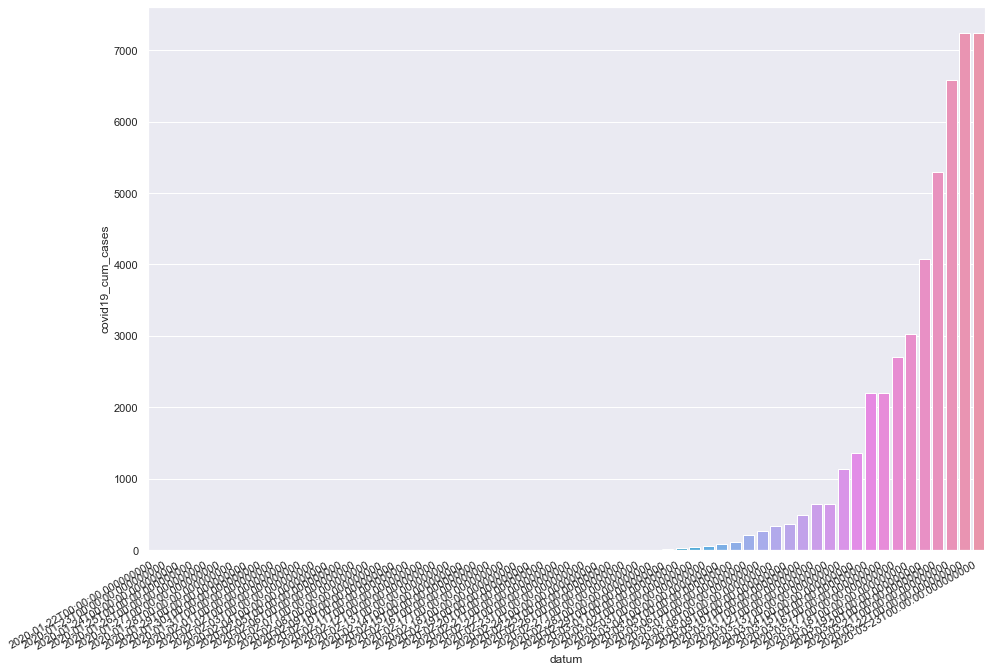

In [516]:
plt.figure(figsize=(15,10))
#xticks = np.linspace(start=1, stop=365.25*24, num=13, endpoint=True)

ax=sns.barplot(x="datum", y="covid19_cum_cases",data=covid19_ch)
plt.xticks(rotation=30, ha="right")
#ax.set_xticks(xticks)

In [525]:
covid19_ch.loc[:, "covid19_new_cases"] = covid19_ch.covid19_cum_cases - covid19_ch.covid19_cum_cases.shift(1).fillna(0)
covid19_ch = covid19_ch[covid19_ch.covid19_cum_cases >0]

In [534]:
desc_col(covid19_ch)

,DTYPE,NULLS,UNIQUE
datum,datetime64[ns],0/28,28
covid19_cum_cases,int64,0/28,23
covid19_new_cases,float64,0/28,24


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

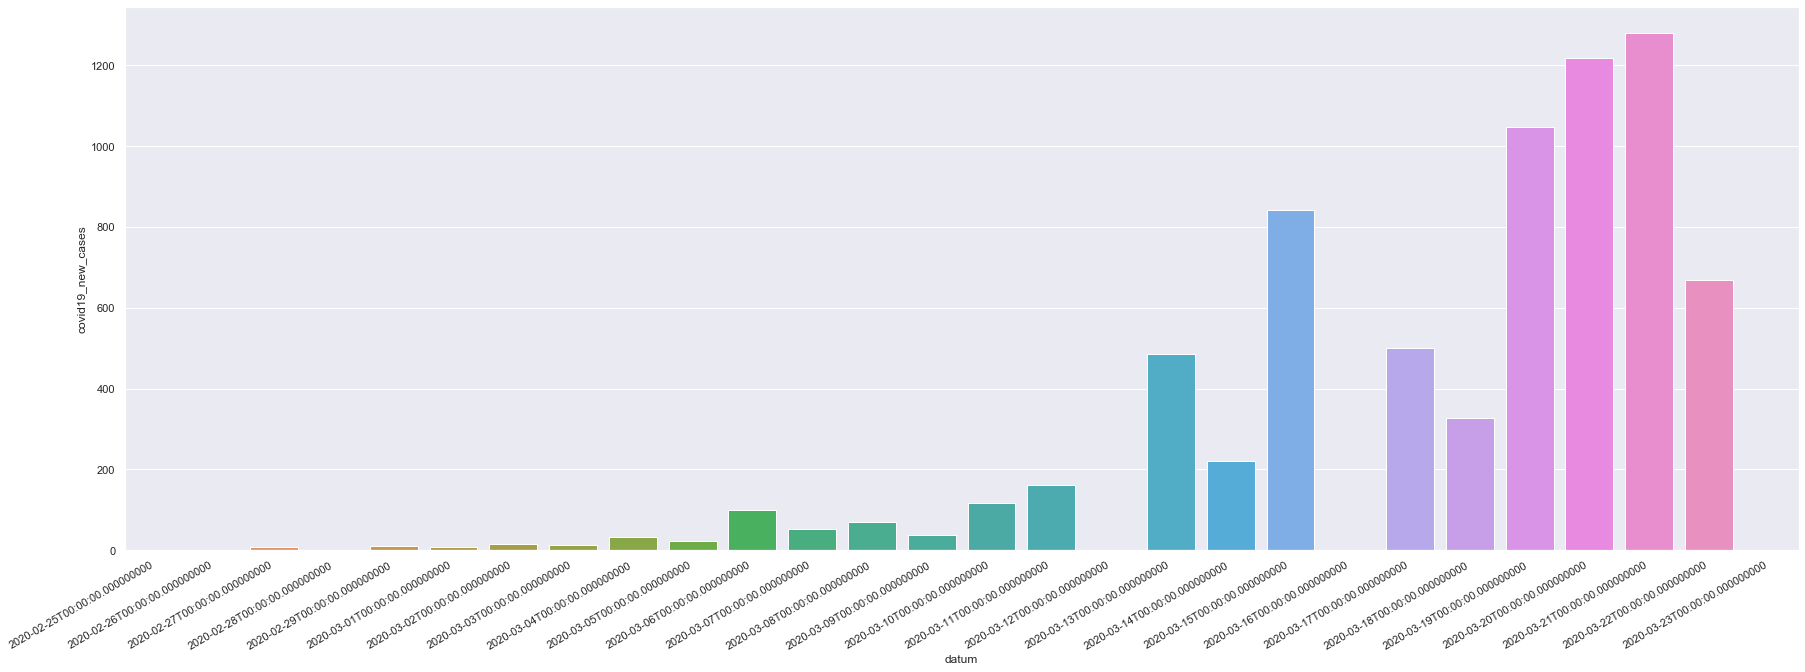

In [535]:
plt.figure(figsize=(30,10))
#xticks = np.linspace(start=1, stop=365.25*24, num=13, endpoint=True)

ax=sns.barplot(x="datum", y="covid19_new_cases",data=covid19_ch)
plt.xticks(rotation=30, ha="right")
#ax.set_xticks(xticks)